<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [6]:
pip install js

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for js: filename=js-1.0-py3-none-any.whl size=2967 sha256=de12808f2c673e755f6db8fcfd8c71a5fa3297ad1c250ef0fa4cb8b6070d866a
  Stored in directory: c:\users\aaron\appdata\local\pip\cache\wheels\b4\f8\25\e50f63786e539cae2b07ec287a07e8d21b6f883b2785853b5e
Successfully built js
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [15]:
import requests
from io import StringIO
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = requests.get(url)
boston_df = pd.read_csv(StringIO(resp.text))

In [16]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


# The following describes the dataset variables:

<ul>
    <li>CRIM - per capita crime rate by town</li>
    <li>ZN - proportion of residential land zoned for lots over 25,000 sq.ft.</li>
    <li>INDUS - proportion of non-retail business acres per town.</li>
    <li>CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)</li>
    <li>NOX - nitric oxides concentration (parts per 10 million)</li>
    <li>RM - average number of rooms per dwelling</li>
    <li>AGE - proportion of owner-occupied units built prior to 1940</li>
    <li>DIS - weighted distances to five Boston employment centres</li>
    <li>RAD - index of accessibility to radial highways</li>
    <li>TAX - full value property tax rate per \$10,000</li>
    <li>PTRATIO - pupil teacher ratio by town</li>
    <li>LSTAT - % lower status of the population</li>
    <li>MEDV - Median value of owner-occupied homes in \$1000's</li>
</ul>

# Task 2: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:
<ul>
<li>For the "Median value of owner-occupied homes" provide a boxplot</li>
<li>Provide a  bar plot for the Charles river variable</li>
<li>Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)</li>
<li>Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?</li>
<li>Create a histogram for the pupil to teacher ratio variable</li>
</ul>


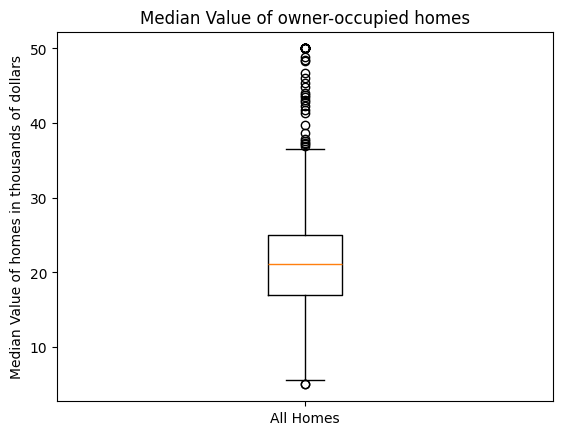

In [111]:
#For the "Median value of owner-occupied homes" provide a boxplot
ax1 = boston_df['MEDV']
plt.title('Median Value of owner-occupied homes')
plt.ylabel('Median Value of homes in thousands of dollars')
plt.boxplot(ax1)
plt.xticks([1],['All Homes'])
plt.show()


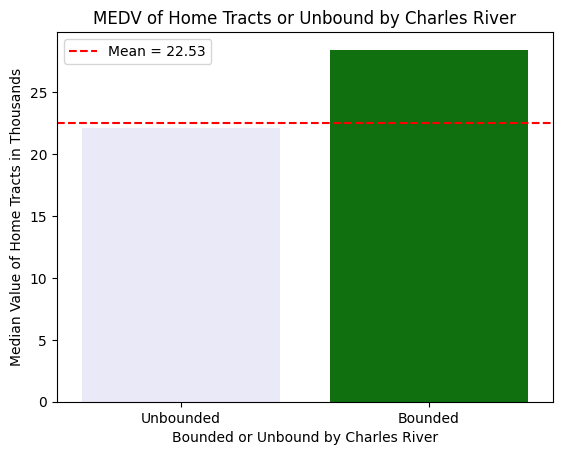

In [119]:
#Provide a bar plot for the Charles river variable
mean_medv = boston_df['MEDV'].mean()
sns.barplot(x='CHAS', y='MEDV', hue = 'CHAS', data=boston_df, palette = ['Lavender','Green'],legend=False, errorbar=None)
plt.title('MEDV of Home Tracts or Unbound by Charles River')
plt.xticks([0,1],['Unbounded', 'Bounded'])
plt.ylabel('Median Value of Home Tracts in Thousands')
plt.xlabel('Bounded or Unbound by Charles River')
plt.axhline(mean_medv,color='red', linestyle='--',label=f'Mean = {mean_medv:.2f}')
plt.legend()
plt.show()

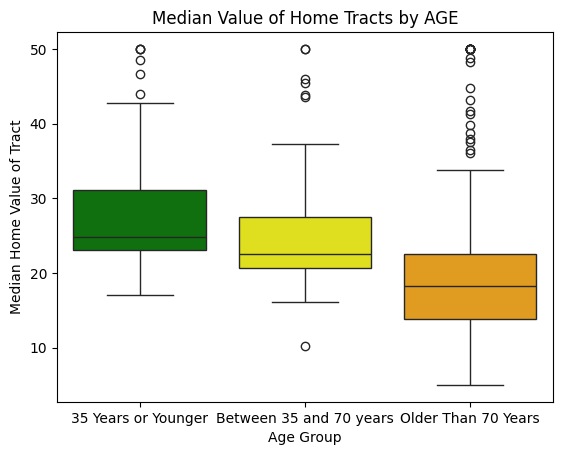

In [69]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
#First we create new variables to hold or discrete series
#The question is misleading because the AGE variable is not listed as the average age of the home in the tract but the proportion of homes built before 1940
boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=[0,35,70,100],labels=['35_under', '35_Between', '70_older'])
sns.boxplot(data=boston_df, x='age_group', y='MEDV',hue='age_group', palette=['green','yellow','orange'])
plt.xticks([0,1,2],['35 Years or Younger', 'Between 35 and 70 years', 'Older Than 70 Years'])
plt.title('Median Value of Home Tracts by AGE')
plt.xlabel('Age Group')
plt.ylabel('Median Home Value of Tract')
plt.show()

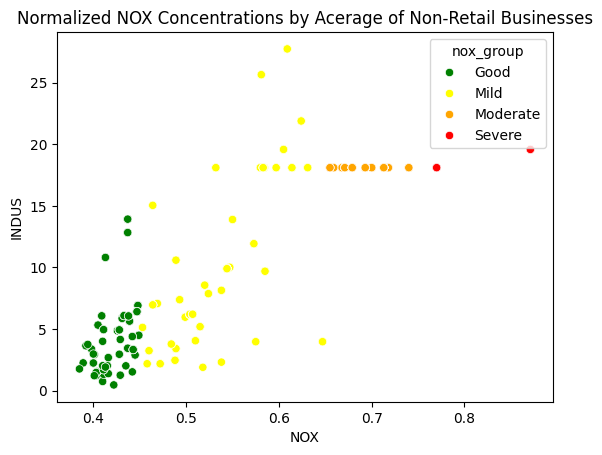

In [122]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
boston_df['nox_group'] = pd.cut(boston_df['NOX'], bins=[0,.45,.65,.75,1.00], labels=['Good','Mild','Moderate','Severe'])
sns.scatterplot(data=boston_df, x= 'NOX', y='INDUS', hue='nox_group', palette = ['green','yellow','orange', 'red'])
plt.title('Normalized NOX Concentrations by Acerage of Non-Retail Businesses')
plt.show()

Text(0.5, 1.0, 'Pupil Teacer Ratio of Home Tracts in Boston')

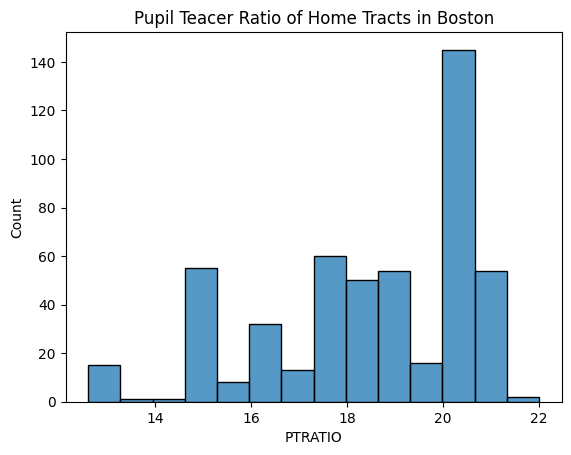

In [123]:
#Create a histogram for the pupil to teacher ratio variable
sns.histplot(boston_df['PTRATIO'], bins='auto')
plt.title('Pupil Teacer Ratio of Home Tracts in Boston')


# Task 3: Use the appropriate tests to answer the questions provided.
For each of the following questions;
<ul>
<li>Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)</li>
<li>Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)</li>
<li>Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)</li>
<li>What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)</li>
</ul>
Be sure to:
<ol>
<li>State your hypothesis.</li>
<li>Use α = 0.05</li>
<li>Perform the test Statistics.</li>
<li>State the conclusion from the test.</li>
</ol>

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
1: Our Null Hypothesis is that there is not a significant difference in median value of houses bounded by the charles river and or alternative hypothesis is that there is a statistically significant difference in the mean of median value of houses in tracts bounded by the Charles River


In [79]:
#first we will run a levene test to check for equal variances
scipy.stats.levene(boston_df[boston_df['CHAS']==1]['MEDV'],boston_df[boston_df['CHAS']==0]['MEDV'])

LeveneResult(statistic=np.float64(4.590342218715871), pvalue=np.float64(0.03263097600633006))

Since our levene result is less than .05 we can assume that variances are not equal for our T-Test

In [80]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'],boston_df[boston_df['CHAS']==0]['MEDV'], equal_var=False)

TtestResult(statistic=np.float64(3.113291312794837), pvalue=np.float64(0.0035671700981375174), df=np.float64(36.876408797611994))

4. Since the p value is less than .05 we reject the null hypothesis that the median home value for home tracts bounded and unbounded are not statistically significantly different.  

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
1. Our null hypothesis is that there is not a difference in the MEDV for each proportion of owner occupied units built prior to 1940 while our alternative hypothesis is that there is a statistically significant difference in MEDV for each proportion

In [89]:
# First we must bin the results into groups, the question does not explicitly state the proportions so we will divide into quarters
boston_df['age_group2'] = pd.cut(boston_df['AGE'],bins=[0,25,50,75,100], labels=['FirstQ', 'SecondQ','ThirdQ','FourthQ'])
boston_df['AGE'].max()

np.float64(100.0)

In [93]:
#with our new dataframe we will assign variables to the quarters for ease of use
firstQ = boston_df[boston_df['age_group2'] == 'FirstQ']['MEDV']
secondQ = boston_df[boston_df['age_group2'] == 'SecondQ']['MEDV']
thirdQ = boston_df[boston_df['age_group2'] == 'ThirdQ']['MEDV']
fourthQ = boston_df[boston_df['age_group2'] == 'FourthQ']['MEDV']
#run the levenes test for variance equality check
scipy.stats.levene(firstQ,secondQ,thirdQ,fourthQ)

LeveneResult(statistic=np.float64(1.7345193095147908), pvalue=np.float64(0.15895048428881292))

Since our p-value for the levene test is greater than .05 we can assume equal variances for our ANOVA test

In [94]:
#now we will run the ANOVA
scipy.stats.f_oneway(firstQ, secondQ, thirdQ, fourthQ)

F_onewayResult(statistic=np.float64(25.549830466017518), pvalue=np.float64(2.137213473971852e-15))

Since our p-value of the ANOVA is less than .05 we reject the null hypothesis that there is no statistically significant difference of mean of the median home value for tracts of homes in Boston when grouped by the proportion of homes built before 1940. 

# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

1. Our null hypothesis is that there is no linear correlation between Nictric Oxide concentrations and the proportion of non-retail business acres per town, while our alternative hypothesis is that there a linear is a correlation between Nictric Oxide concentrations and the proportion of non-retail business acres per town

In [95]:
#we simply run the pearsonr 
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241532e-98))

4. Since the p value is less than .05 we reject the null hypothesis. Based on the correlation coefficient from the pearson test we can say that there is a strong positive correlation between between Nictric Oxide concentrations and the proportion of non-retail business acres per town. We cannot assume causality.

# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
1. Our null hypothesis stats that there is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes, while our alternative hypothesis stats that ther is a statistically significant impact.


In [99]:
X = boston_df['DIS']
y = boston_df['MEDV']
X= sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        14:59:54   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='DIS', ylabel='MEDV'>

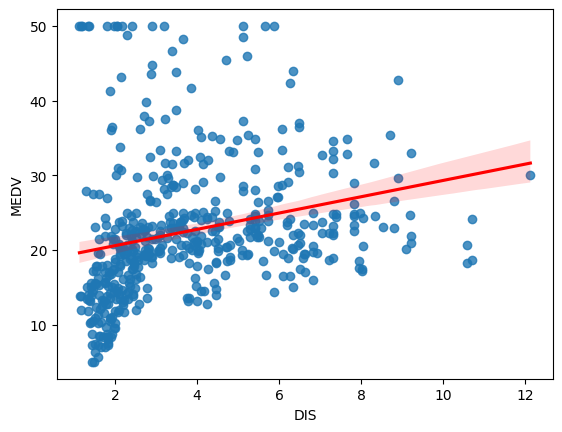

In [103]:
sns.regplot(x='DIS', y ='MEDV', data=boston_df, line_kws={'color':'red'})

4. From the results we can see a p-value less than .05 so we reject the null hypothesis that there is no impact of the distance to an employment center and the median value of homes. However with an r squared value of .062 we can see that the distance to an employment center only explains about 6.2% of the variance in the MEDV, further reinforcing the week correlation. For every unit of distance we move away from the employment center, the median home value increases by $1091.60.

It may be worth investigating the cluster of high median value homes which are close to the employment center to see if this is skewing the trend line.